# Machine Learning Analysis to Predict is_liked 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pred_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset1.csv')

pred_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1894,45,10,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [3]:
#split out the y column and drop the x column 
#split the data into training and testing sets
#scale the features so that date doesn't play an outsized role

Y = pred_df[['is_liked']].copy()

Y = np.ravel(Y)

X = pred_df.drop(columns = ['is_liked'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

X_s = MinMaxScaler().fit(X_train)

X_tr_scale = X_s.transform(X_train)
X_ts_scale = X_s.transform(X_test)


In [4]:
X_tr_scale

array([[0.81746032, 0.08474576, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.78571429, 0.04563233, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.06388527, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96825397, 0.08996089, 0.72727273, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.07692308, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.61904762, 0.06127771, 0.27272727, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X_ts_scale

array([[0.97619048, 0.0821382 , 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       [0.92063492, 0.06127771, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.79365079, 0.07692308, 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26984127, 0.14341591, 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.8968254 , 0.05736636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94444444, 0.09387223, 0.63636364, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
Y_train

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [7]:
#try a support vector machine model
from sklearn.svm import SVC
from sklearn.metrics import classification_report

movie_preds_svc = SVC(kernel='linear')

movie_preds_svc.fit(X_tr_scale, Y_train)



SVC(kernel='linear')

In [8]:
mov_preds_svc = movie_preds_svc.predict(X_ts_scale)

mov_preds_svc

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
print(classification_report(Y_test, mov_preds_svc))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66     10174
           1       0.69      0.74      0.71     11290

    accuracy                           0.69     21464
   macro avg       0.69      0.69      0.69     21464
weighted avg       0.69      0.69      0.69     21464



These results aren't amazing, but they are a good starting point. The next thing I need to do is compare some different models and see which ones get the best results. I also need to try a model that allows me to see which features are most important. 
I think decision tree or random forest might be able to do those things. 

In [10]:
#now it's time to try decision tree 
from sklearn.tree import DecisionTreeClassifier

#I'm going to start with all default hyperparameters and possibly mess with them later based on the outcome
#in particular, I'm interested in the depth of the tree that I end up with as that seems to be the main hyperparameter that 
#leads to overfitting or underfitting in most cases

d_tree = DecisionTreeClassifier()

d_tree.fit(X_tr_scale, Y_train)


DecisionTreeClassifier()

In [11]:
#lets look at accuracy now

train_acc = d_tree.score(X_tr_scale, Y_train)
test_acc = d_tree.score(X_ts_scale, Y_test)

print(f'Training accuracy:{train_acc}')
print(f'Testing accuracy:{test_acc}')

Training accuracy:0.9782888913046854
Testing accuracy:0.6261647409616101


This large drop in accuracy probably is due to overfitting. 

In [12]:
#try to look at feature importance

imp_list1 =list( d_tree.feature_importances_)

imp_list1

[0.28512183419936243,
 0.2768672208212787,
 0.18710555707232918,
 0.015504871570375407,
 0.006753433684936934,
 0.005220653584368422,
 0.0039452136038420444,
 0.005388482752096839,
 0.00943675308230922,
 0.05122875976679228,
 0.003978678361485816,
 0.008149893720319235,
 0.006612389927180892,
 0.008406614035252948,
 0.0038968517421669848,
 0.01429396451371705,
 0.0,
 0.008952349273527166,
 0.008627498197039321,
 0.0071309401674800165,
 0.017057583848666114,
 0.009008749584990686,
 7.066877335856373e-05,
 0.021219637042872358,
 0.002338815801653162,
 0.002176324326922843,
 0.00016037418957869556,
 0.0003894487137449332,
 0.0130919023848964,
 0.0007454164963029484,
 0.0019631281954208706,
 0.002791155487765977,
 0.0029905020449244937,
 0.002258202375820549,
 7.460170495252914e-05,
 0.004433991885216038,
 0.0006531105800331612,
 0.00195442648701854]

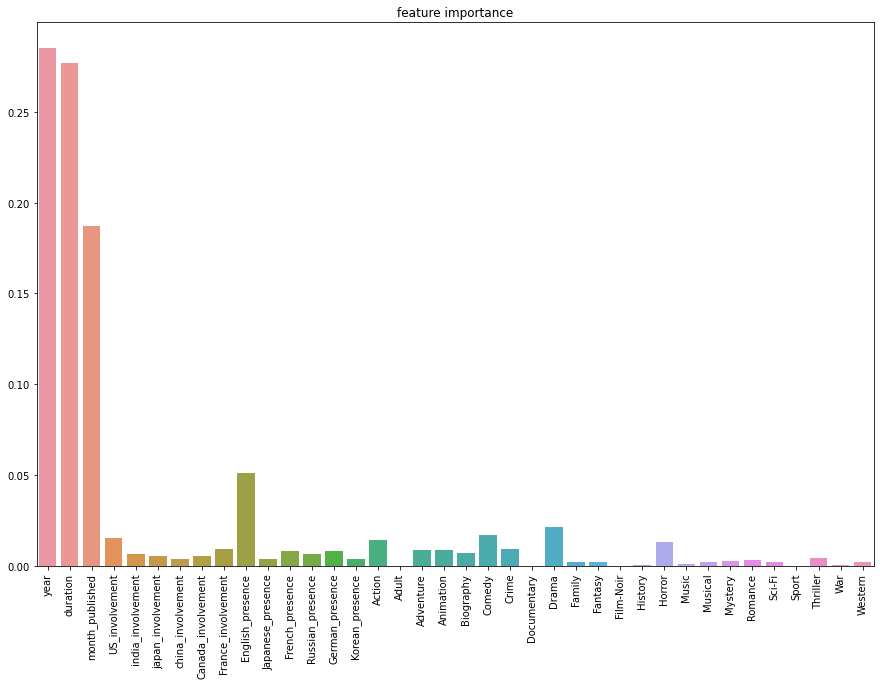

In [13]:
#try a plot to make this easier to see

features = list(X.columns.values)

#set up a dictionary with feature : importance key value pairs
#one of the features was unused, and 

i_dict1 = {}

for i in range(38):
    i_dict1.update({features[i] : imp_list1[i]})

i1_df = pd.DataFrame(i_dict1, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i1_df)
plt.xticks(rotation = 90)

plt.show()


In [14]:
from sklearn import tree


In [15]:
#Write a loop to try some different tree depths

train_scores = []
test_scores = []

for s in range(4, 49, 4):
    iter_tree = DecisionTreeClassifier(max_depth = s)
    iter_tree.fit(X_tr_scale, Y_train)
    i_train_ac = iter_tree.score(X_tr_scale, Y_train)
    i_test_ac = iter_tree.score(X_ts_scale, Y_test)
    train_scores.append(i_train_ac)
    test_scores.append(i_test_ac)

print(train_scores)
print(test_scores)

[0.6735102731748226, 0.707552297681353, 0.7400568402416486, 0.7959342144088459, 0.8590641549284838, 0.9114783121864857, 0.9463434330884751, 0.9655697224767437, 0.9741578792067215, 0.9775900358745787, 0.9780869997359879, 0.9782888913046854]
[0.6742452478568767, 0.6975400670890793, 0.6910175177040626, 0.6692135669027208, 0.6561218784942229, 0.6398620946701453, 0.6300782705926202, 0.6309634737234439, 0.6264442787923966, 0.6270965337308982, 0.626257920238539, 0.6248602310846068]


In [16]:
#prepare to plot this data

t_deep = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]

f_dict = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores, 'Test_Accuracy': test_scores}

fit_df = pd.DataFrame(f_dict)

fit_df = fit_df.set_index('Tree_Depth')

fit_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.673510,0.674245
8,0.707552,0.697540
12,0.740057,0.691018
16,0.795934,0.669214
20,0.859064,0.656122
24,0.911478,0.639862
28,0.946343,0.630078
32,0.965570,0.630963
36,0.974158,0.626444


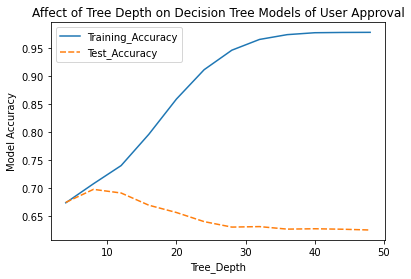

In [17]:
#lineplot in seaborn

sn.lineplot( data = fit_df)
plt.title('Affect of Tree Depth on Decision Tree Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

Interestingly the ability of the model to predict the test data diminishes as it fits the training data better. The optimal fitting uses trees with a depth of only 8. This returns results with about the same accuracy as the support vector machine model I did previously. 

In [18]:
#we should hone in on the tree model with a depth of 8 and try to understand how it is working

eight_tree = DecisionTreeClassifier(max_depth = 8)

eight_tree.fit(X_tr_scale, Y_train)

ei_train = eight_tree.score(X_tr_scale, Y_train)

ei_test = eight_tree.score(X_ts_scale, Y_test)

print(f'training accuracy:{ei_train}')
print(f'test accuracy: {ei_test}')


training accuracy:0.7075988880433601
test accuracy: 0.697726425642937


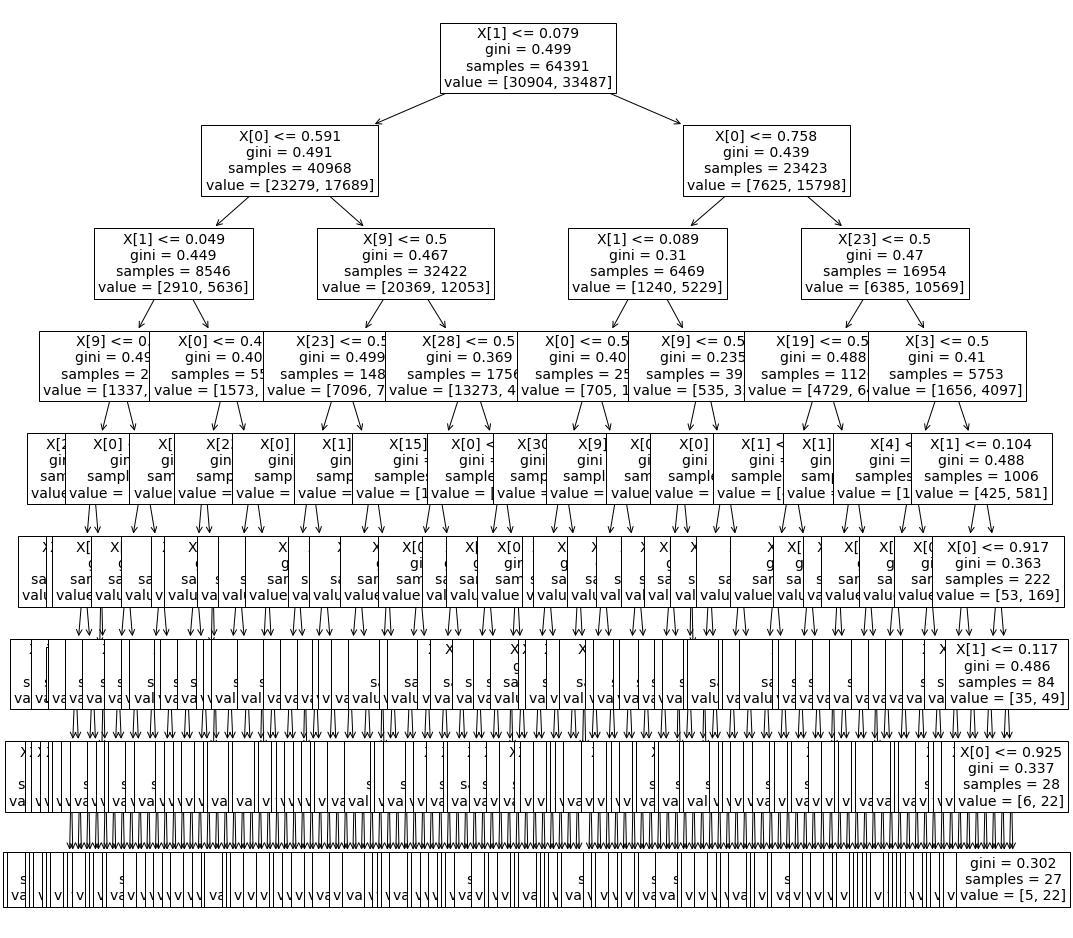

In [19]:
plt.figure(figsize = (17,17))

tree.plot_tree(eight_tree, fontsize = 14)
plt.savefig(f'desktop/independant_projects/Movie_score_predictor/figures/example_tree.png')
plt.show()

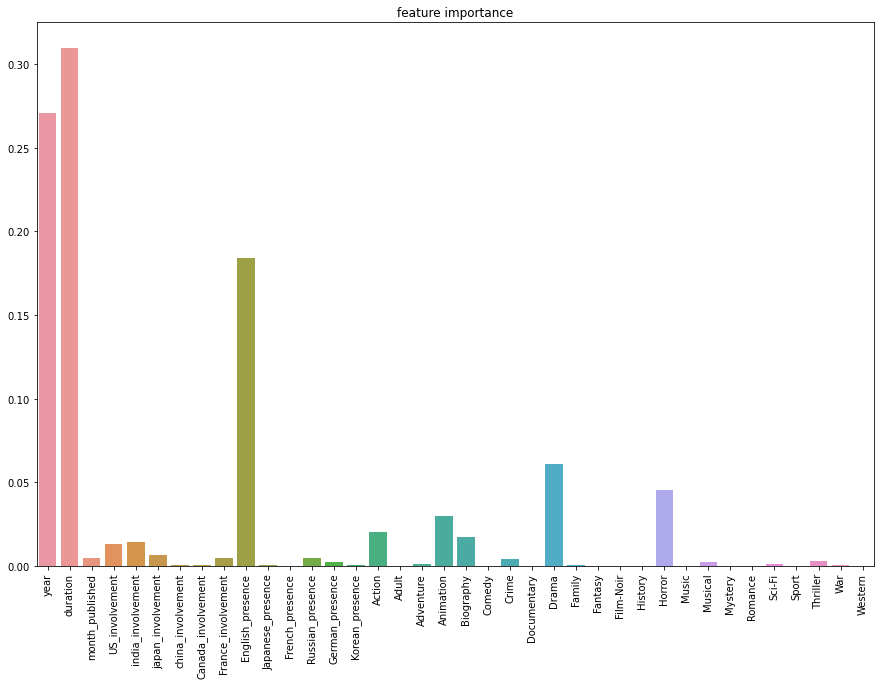

In [20]:
#plot feature importance

i_list_2 = list(eight_tree.feature_importances_)

i_dict2 = {}

for i in range(38):
    i_dict2.update({features[i] : i_list_2[i]})

i2_df = pd.DataFrame(i_dict2, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i2_df)
plt.xticks(rotation = 90)

plt.show()


In [21]:
#Try a random forest model
from sklearn.ensemble import RandomForestClassifier

#random forest works a lot like decision tree, but with a lot of them. I'm going to start with default hyperparameters, 
#just to see what I get

d_rf = RandomForestClassifier()

d_rf = d_rf.fit(X_tr_scale, Y_train)

for_train = d_rf.score(X_tr_scale, Y_train)
for_test = d_rf.score(X_ts_scale, Y_test)

print(f'Training accuracy:{for_train}')
print(f'Testing accuracy:{for_test}')

Training accuracy:0.9782733611840164
Testing accuracy:0.6767144986954902


In [22]:
#Write a loop to try some different tree depths

train_scores2 = []
test_scores2 = []

for t in range(4, 49, 4):
    iter_for = RandomForestClassifier(max_depth = t)
    iter_for.fit(X_tr_scale, Y_train)
    i_train_ac2 = iter_for.score(X_tr_scale, Y_train)
    i_test_ac2 = iter_for.score(X_ts_scale, Y_test)
    train_scores2.append(i_train_ac2)
    test_scores2.append(i_test_ac2)

print(train_scores2)
print(test_scores2)

[0.6962308397136245, 0.7062943579071609, 0.7312978521843114, 0.7817707443586837, 0.8519668897827336, 0.91818732431551, 0.9621065055675483, 0.9763631563417248, 0.9782112407013402, 0.9782267708220093, 0.9782733611840164, 0.9782112407013402]
[0.6941856131196422, 0.7008013417815878, 0.7084886321282147, 0.7110976518822214, 0.7020592620201267, 0.6956298919120387, 0.6863119642191576, 0.6789508013417815, 0.6765747297800969, 0.6767610883339545, 0.6781587774878867, 0.6776928811032427]


In [23]:
f_dict2 = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores2, 'Test_Accuracy': test_scores2}

fit2_df = pd.DataFrame(f_dict2)

fit2_df = fit2_df.set_index('Tree_Depth')

fit2_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.696231,0.694186
8,0.706294,0.700801
12,0.731298,0.708489
16,0.781771,0.711098
20,0.851967,0.702059
24,0.918187,0.695630
28,0.962107,0.686312
32,0.976363,0.678951
36,0.978211,0.676575


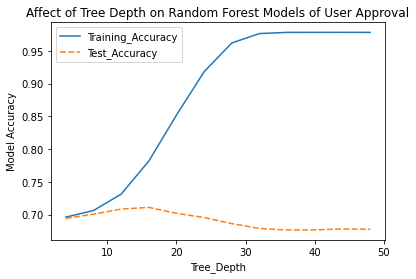

In [24]:
sn.lineplot( data = fit2_df)
plt.title('Affect of Tree Depth on Random Forest Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

In [25]:
#Write a loop to try some different tree numbers

train_scores4 = []
test_scores4 = []

for u in range(25, 301, 25):
    iter_for = RandomForestClassifier(max_depth = 16, n_estimators=u)
    iter_for.fit(X_tr_scale, Y_train)
    i_train_ac4 = iter_for.score(X_tr_scale, Y_train)
    i_test_ac4 = iter_for.score(X_ts_scale, Y_test)
    train_scores4.append(i_train_ac4)
    test_scores4.append(i_test_ac4)

print(train_scores4)
print(test_scores4)

[0.7776397322607197, 0.7759314189871255, 0.781491202186641, 0.7814601419453029, 0.7831063347362209, 0.7811029491699151, 0.7827957323228402, 0.7828112624435092, 0.7810252985665699, 0.7786491901042071, 0.7832926961842493, 0.781894985324036]
[0.7084886321282147, 0.7094204248975028, 0.7096999627282893, 0.7092340663436452, 0.710259038389862, 0.7109578829668282, 0.7107249347745062, 0.7115635482668654, 0.7116101379053299, 0.7101192694744689, 0.7107715244129705, 0.7101192694744689]


In [26]:
nestimate = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

f_dict4 = {'n_estimators': nestimate, 'Training_Accuracy': train_scores4, 'Test_Accuracy': test_scores4}

fit4_df = pd.DataFrame(f_dict4)

fit4_df = fit4_df.set_index('n_estimators')

fit4_df

,Training_Accuracy,Test_Accuracy
n_estimators,,
25,0.777640,0.708489
50,0.775931,0.709420
75,0.781491,0.709700
100,0.781460,0.709234
125,0.783106,0.710259
150,0.781103,0.710958
175,0.782796,0.710725
200,0.782811,0.711564
225,0.781025,0.711610


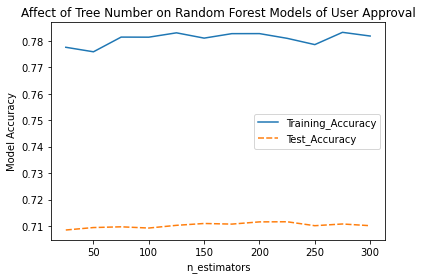

In [27]:
sn.lineplot( data = fit4_df)
plt.title('Affect of Tree Number on Random Forest Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

In [28]:
#we should hone in on the tree model with a depth of 8 and try to understand how it is working

sixteen_for = RandomForestClassifier(max_depth = 16)

sixteen_for.fit(X_tr_scale, Y_train)

si_train = sixteen_for.score(X_tr_scale, Y_train)

si_test = sixteen_for.score(X_ts_scale, Y_test)

print(f'training accuracy:{si_train}')
print(f'test accuracy: {si_test}')

training accuracy:0.7820658166513954
test accuracy: 0.7121226239284383


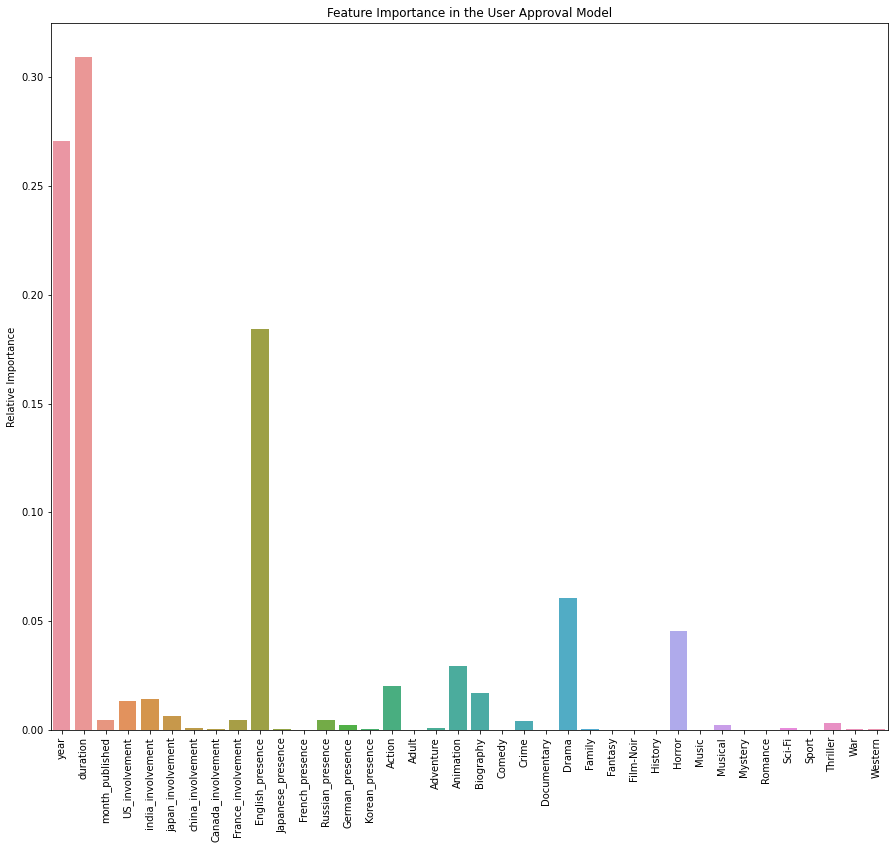

In [29]:
#plot feature importance

i_list_4 = list(sixteen_for.feature_importances_)

i_dict4 = {}

for i in range(38):
    i_dict4.update({features[i] : i_list_2[i]})

i4_df = pd.DataFrame(i_dict4, index = [0])

plt.figure(figsize = (15, 13))
plt.title('Feature Importance in the User Approval Model')
plt.ylabel('Relative Importance')
sn.barplot( data = i4_df)
plt.xticks(rotation = 90)
plt.savefig(f'desktop/independant_projects/Movie_score_predictor/figures/fi_approval.png')
plt.show()


In [30]:
#what features have zero importance?

i4_df.T

,0
year,0.270962
duration,0.309489
month_published,0.004401
US_involvement,0.013231
india_involvement,0.014199
japan_involvement,0.006246
china_involvement,0.000614
Canada_involvement,0.000539
France_involvement,0.004574
English_presence,0.184136


War, Romance, Mystery, Music, Film-Noir, Documentary, Comedy, Adult, French_presence. These nine features have no importance in the Random Forest Model. 

In [31]:
#new dataset without the irrelevant features

X_essential = X.drop(columns = ['War', 'Romance', 'Mystery', 'Music', 'Film-Noir', 
                               'Documentary', 'Comedy', 'Adult', 'French_presence'])

X_train_ess, X_test_ess = train_test_split(X_essential, random_state = 42)

X_s_ess = MinMaxScaler().fit(X_train_ess)

X_tr_scale_ess = X_s_ess.transform(X_train_ess)
X_ts_scale_ess = X_s_ess.transform(X_test_ess)

In [32]:
#rerun sixteen_for

sixteen_for_2 = RandomForestClassifier(max_depth = 16)

sixteen_for_2.fit(X_tr_scale_ess, Y_train)

si_train_ess = sixteen_for_2.score(X_tr_scale_ess, Y_train)

si_test_ess = sixteen_for_2.score(X_ts_scale_ess, Y_test)

print(f'training accuracy:{si_train_ess}')
print(f'test accuracy: {si_test_ess}')

training accuracy:0.7778882141914243
test accuracy: 0.7103988073052553


In [33]:
#classification report
sixteen_for_2_preds = sixteen_for_2.predict(X_ts_scale_ess)

print(classification_report(Y_test, sixteen_for_2_preds))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     10174
           1       0.71      0.75      0.73     11290

    accuracy                           0.71     21464
   macro avg       0.71      0.71      0.71     21464
weighted avg       0.71      0.71      0.71     21464



# Machine Learning Analysis on is_outlier 

In [34]:
pred2_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset2.csv')

pred2_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,genre_complexity,UK_involvement,is_outlier
0,1894,45,10,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [35]:
#redo the train test split manipulations for the new set

Y2 = pred2_df[['is_outlier']].copy()

Y2 = np.ravel(Y2)

X2 = pred2_df.drop(columns = ['is_outlier'])

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state = 42)

X2_s = MinMaxScaler().fit(X2_train)

X2_tr_scale = X2_s.transform(X2_train)
X2_ts_scale = X2_s.transform(X2_test)

In [36]:
#repeat the decision tree analysis on tree depth with the new dataset
#Write a loop to try some different tree depths

train_scores2 = []
test_scores2 = []

for z in range(4, 49, 4):
    i2_tree = DecisionTreeClassifier(max_depth = z)
    i2_tree.fit(X2_tr_scale, Y2_train)
    i2_train_ac = i2_tree.score(X2_tr_scale, Y2_train)
    i2_test_ac = i2_tree.score(X2_ts_scale, Y2_test)
    train_scores2.append(i2_train_ac)
    test_scores2.append(i2_test_ac)

print(train_scores2)
print(test_scores2)


[0.803388672329984, 0.8163718532092994, 0.8438912270348341, 0.8946281312605799, 0.9468869873118914, 0.9790498672174682, 0.9906353372365704, 0.9936171204050256, 0.9939743131804134, 0.9940053734217514, 0.9940053734217514, 0.9940053734217514]
[0.8017610883339545, 0.8083302273574358, 0.8012951919493104, 0.7778606038017145, 0.755404398061871, 0.7407752515840477, 0.7341595229221021, 0.7361628773760716, 0.7353708535221767, 0.7350447260529258, 0.736442415206858, 0.7369549012299664]


In [37]:
f_dict3 = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores2, 'Test_Accuracy': test_scores2}

fit3_df = pd.DataFrame(f_dict3)

fit3_df = fit3_df.set_index('Tree_Depth')

fit3_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.803389,0.801761
8,0.816372,0.808330
12,0.843891,0.801295
16,0.894628,0.777861
20,0.946887,0.755404
24,0.979050,0.740775
28,0.990635,0.734160
32,0.993617,0.736163
36,0.993974,0.735371


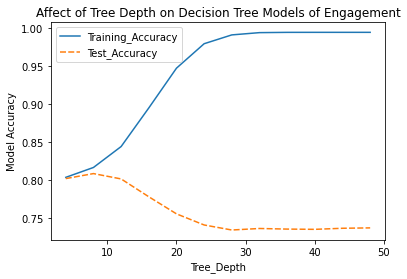

In [38]:
sn.lineplot( data = fit3_df)
plt.title('Affect of Tree Depth on Decision Tree Models of Engagement')
plt.ylabel('Model Accuracy')
plt.savefig("desktop/independant_projects/Movie_score_predictor/tree_fit_1.png")
plt.show()

In [39]:
#Run Prediction with the best decision tree model

outlier_tree = DecisionTreeClassifier(max_depth = 8)
outlier_tree.fit(X2_tr_scale, Y2_train)
feature_train_ac = outlier_tree.score(X2_tr_scale, Y2_train)
feature_test_ac = outlier_tree.score(X2_ts_scale, Y2_test)
    
print(f'training accuracy:{feature_train_ac}')
print(f'test accuracy: {feature_test_ac}')

training accuracy:0.8163718532092994
test accuracy: 0.8084699962728289


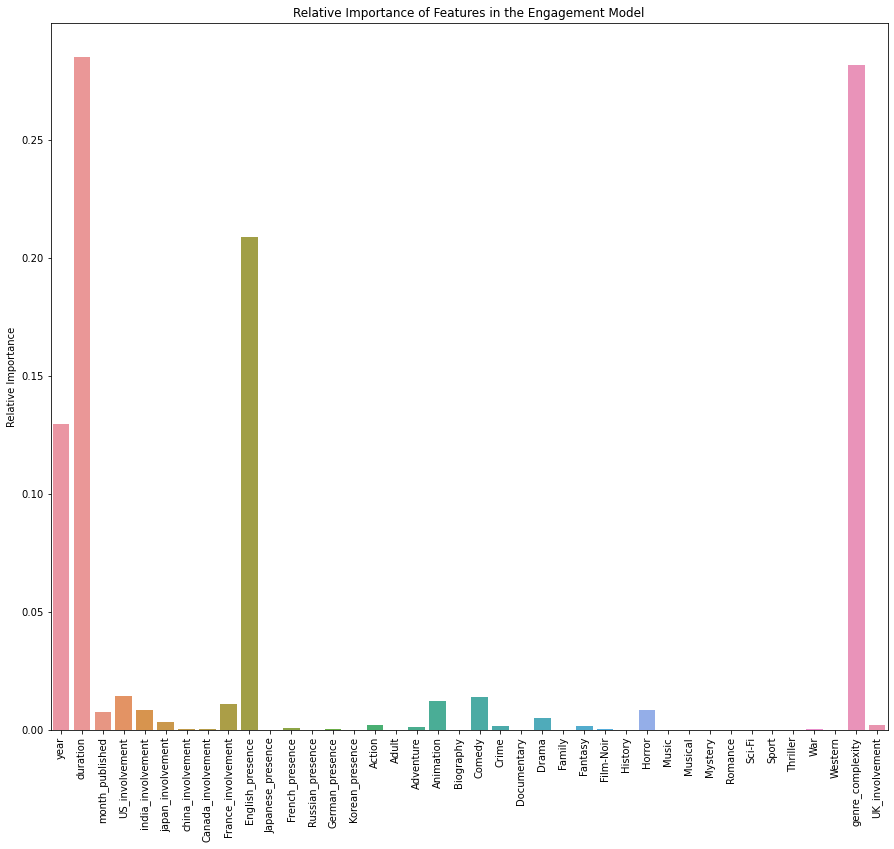

In [40]:
#write the feature importance code as a function so I don't have to keep doing the same copy pasta

def feature_import_plot(method, training_df, title, name):
    feature_list = list(method.feature_importances_)
    feature_names = list(training_df.columns.values)
    plot_dict = {}
    for feats in range(len(feature_list)):
        plot_dict.update({feature_names[feats]: feature_list[feats]})
    plot_df = pd.DataFrame(plot_dict, index = [0])
    
    plt.figure(figsize = (15, 13))
    plt.title(f'{title}')
    plt.ylabel('Relative Importance')
    sn.barplot( data = plot_df)
    plt.xticks(rotation = 90)
    plt.savefig(f'desktop/independant_projects/Movie_score_predictor/figures/{name}.png')
    plt.show()

feature_import_plot(outlier_tree, X2, 'Relative Importance of Features in the Engagement Model', 'fi_engagement')

In [41]:
#use random forest for predicting outliers
#try another iterative approach optimizing for tree depth

outforest_trains = []
outforest_tests = []

for out in range(4, 49, 4):
    i_out_forest = RandomForestClassifier(max_depth = out)
    i_out_forest.fit(X2_tr_scale, Y2_train)
    out_train_ac = i_out_forest.score(X2_tr_scale, Y2_train)
    out_test_ac = i_out_forest.score(X2_ts_scale, Y2_test)
    outforest_trains.append(out_train_ac)
    outforest_tests.append(out_test_ac)

print(outforest_trains)
print(outforest_tests)


[0.7787113105868833, 0.8054386482582969, 0.822366479787548, 0.8512059138699508, 0.9014769144756255, 0.9555838548865525, 0.9808824214564147, 0.9902004938578373, 0.9936171204050256, 0.9939432529390754, 0.9939743131804134, 0.9939277228184062]
[0.7769288110324264, 0.802972418934029, 0.8111256056653, 0.8146664181885949, 0.8137346254193067, 0.8056746179649646, 0.800782705926202, 0.7990122996645546, 0.7971021244875139, 0.7968691762951919, 0.7977077897875513, 0.7980339172568021]


In [42]:
outforest_dict = {'Tree_Depth': t_deep, 'Training_Accuracy': outforest_trains, 'Test_Accuracy': outforest_tests}

outforest_df = pd.DataFrame(outforest_dict)

outforest_df = outforest_df.set_index('Tree_Depth')

outforest_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.778711,0.776929
8,0.805439,0.802972
12,0.822366,0.811126
16,0.851206,0.814666
20,0.901477,0.813735
24,0.955584,0.805675
28,0.980882,0.800783
32,0.990200,0.799012
36,0.993617,0.797102


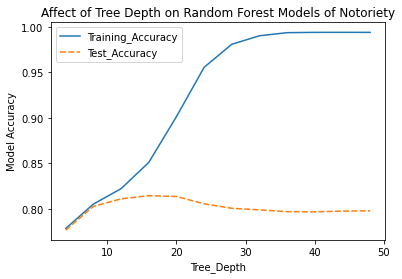

In [43]:
sn.lineplot( data = outforest_df)
plt.title('Affect of Tree Depth on Random Forest Models of Notoriety')
plt.ylabel('Model Accuracy')
plt.show()

In [44]:
#Feature analysis

outforest_16 = RandomForestClassifier(max_depth = 16)
outforest_16.fit(X2_tr_scale, Y2_train)
opt_train = outforest_16.score(X2_tr_scale, Y2_train)
opt_test = outforest_16.score(X2_ts_scale, Y2_test)

print(f'training accuracy:{opt_train}')
print(f'test accuracy: {opt_test}')

training accuracy:0.8514388656799863
test accuracy: 0.8145266492732016


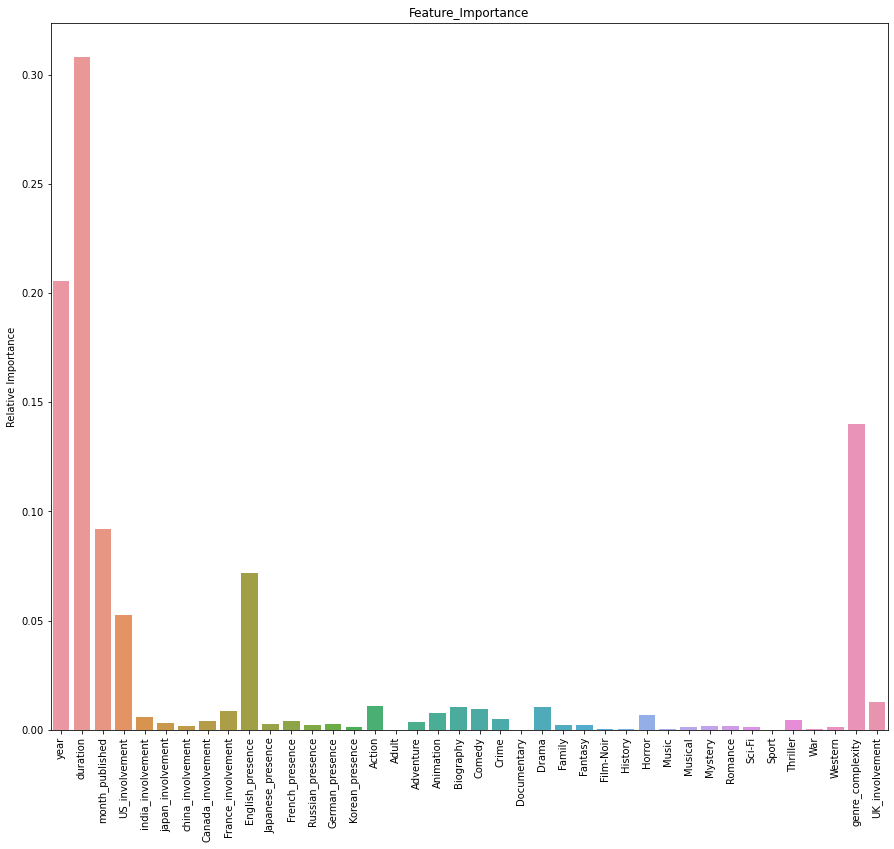

In [46]:
#most important feature analysis

feature_import_plot(outforest_16, X2, 'Feature_Importance', 'outforest_16_plot')

In [47]:
#classification report, Outlier tree

outlier_tree_preds = outlier_tree.predict(X2_ts_scale)

print(classification_report(Y2_test, outlier_tree_preds))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     16667
           1       0.64      0.33      0.44      4797

    accuracy                           0.81     21464
   macro avg       0.73      0.64      0.66     21464
weighted avg       0.79      0.81      0.78     21464



The recall on the model above tells me that this model is actually really good for predicting duds. It gets most of the non-outlier engagement movies correct, but it overestimates the movies that are going to be duds. One might call this a 'conservative producer model'. 

In [48]:
# I'm now going to take a stab at implementing a logistic regression model on the outlier data
from sklearn.linear_model import LogisticRegression

In [50]:
#set up my model for logistic regression using defaults, then score the model after fitting
#model ran out of iterations (still returned 80% accuracy), tuning to give it more for convergence

LR_outs_1 = LogisticRegression(max_iter=1000)

LR_outs_1.fit(X2_tr_scale, Y2_train)

LR1_train_score = LR_outs_1.score(X2_tr_scale, Y2_train)
LR1_test_score = LR_outs_1.score(X2_ts_scale, Y2_test)

print(f'training accuracy:{LR1_train_score}')
print(f'test accuracy: {LR1_test_score}')

training accuracy:0.8049727446382259
test accuracy: 0.8016213194185613


In [51]:
#Classification report for logistic regression model

LR1_preds = LR_outs_1.predict(X2_ts_scale)

print(classification_report(Y2_test, LR1_preds))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     16667
           1       0.66      0.23      0.34      4797

    accuracy                           0.80     21464
   macro avg       0.74      0.60      0.61     21464
weighted avg       0.78      0.80      0.76     21464

